In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import itertools
import calendar
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
# Load all the norads used in training
train_norad_df = pd.read_pickle('train_norads.pkl.gz')
train_norad_list = train_norad_df.norad.to_list()

In [3]:
#csv_store_path = os.environ['GP_HIST_PATH']
csv_store_path = os.environ['my_home_path'] + '\data\space-track-gp-hist-sample'

dfs = None
files = sorted([x for x in os.listdir(f'{csv_store_path}/') if x.endswith(".csv.gz")])
for f in tqdm(files):
    if f.endswith(".csv.gz"):
#        LEO = Mean Motion > 11.25 and Eccentricity < 0.25
        df = pd.read_csv(f'{csv_store_path}/{f}', parse_dates=['EPOCH'], infer_datetime_format=True, index_col='EPOCH', compression='gzip')
        #df = df[(df.MEAN_MOTION > 11.25) & (df.ECCENTRICITY < 0.25)]
        df = df[df.NORAD_CAT_ID.isin(train_norad_list)]
        
        # Since animated gabbard diagrams are generated per frame, we can revert the scaling when we plot the graphs
        if dfs is None:
            dfs = df
        else:
            dfs = pd.concat([dfs,df])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.32it/s]


In [15]:
# Test to see if all norads match train_norad_list
#any([x not in train_norad_list for x in dfs['NORAD_CAT_ID'].unique()])  # should return False
#all([x in train_norad_list for x in dfs['NORAD_CAT_ID'].unique()])  # should return True

## Range of Features
 - **ECCENTRICITY**: 0.000003 - 0.229236
 - **INCLINATION**: 0-180 degree 
 - **RA_OF_ASC_NODE**: 0-360 degree
 - **ARG_OF_PERICENTER**: 0-360 degree
 - **MEAN_ANOMALY**: 0-360 degree
 - **BSTAR**: -0.85 - 100
 - **MEAN_MOTION**: 11.25 - 16.51
 - **MEAN_MOTION_DOT**: -5.59e-2 - 1
 - **MEAN_MOTION_DDOT**: -0.000025 - 0.0797

In [3]:
# NORAD 7078 has 82 TLE entries.
dfs[dfs['OBJECT_TYPE'] != 'PAYLOAD'].groupby('NORAD_CAT_ID').count().sort_values(by='CCSDS_OMM_VERS', ascending=False)[:5]

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
NORAD_CAT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7078,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,0,82,82,82,82,82
10831,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,0,78,78,78,78,78
19135,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,76,76,76,76,76
24807,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,0,75,75,75,75,75
21385,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,0,73,73,73,73,73


In [4]:
dfs.head(1)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
EPOCH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-27 20:00:49.183775,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-05-19T21:06:51,18 SPCS,EO 1,2000-075A,EARTH,TEME,UTC,SGP4,14.570848,0.000192,98.2038,186.7557,94.7873,265.3585,0,U,26619,999,18247,-0.002703,-0.000122,0.0,7080.743,98.827,703.969,701.248,PAYLOAD,LARGE,US,2000-11-21,AFWTR,NaN,1,1,0 EO 1,1 26619U 00075A 04118.83390259 -.00012193 0...,2 26619 98.2038 186.7557 0001921 94.7873 265...


## Data Cleaning
Step 1: Let's now make some of these fields sinusoidal to smooth out the values that hop from a max back to zero (e.g. a degree from 180 -> 0)

In [5]:
tle_columns = ['MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'BSTAR',
               'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']
new_tle_columns = ['MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'BSTAR',
               'INCLINATION_r', 'RA_OF_ASC_NODE_r', 'ECCENTRICITY', 'ARG_OF_PERICENTER_r', 'MEAN_ANOMALY_r', 'MEAN_MOTION']
skip_columns = ['SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS']

# Convert degrees to sin(radians)
dfs['INCLINATION_r'] = np.sin(2*dfs['INCLINATION']*np.pi/180.0)
dfs['RA_OF_ASC_NODE_r'] = np.sin(dfs['RA_OF_ASC_NODE']*np.pi/180.0)
dfs['ARG_OF_PERICENTER_r'] = np.sin(dfs['ARG_OF_PERICENTER']*np.pi/180.0)
dfs['MEAN_ANOMALY_r'] = np.sin(dfs['MEAN_ANOMALY']*np.pi/180.0)

### Convert Epoch to Sinusoidal

In [6]:
dfs['BSTAR'].describe()

count    241687.000000
mean          0.002216
std           0.350373
min          -0.852380
25%           0.000100
50%           0.000148
75%           0.000747
max         100.000000
Name: BSTAR, dtype: float64

In [7]:
dfs[new_tle_columns].head()

,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION_r,RA_OF_ASC_NODE_r,ECCENTRICITY,ARG_OF_PERICENTER_r,MEAN_ANOMALY_r,MEAN_MOTION
EPOCH,,,,,,,,,
2004-04-27 20:00:49.183775,-1.219300e-04,0.0,-0.002703,-0.282469,-0.117636,0.000192,0.996511,-0.996721,14.570848
2004-04-27 14:18:48.216960,1.801000e-05,0.0,0.002592,0.824294,-0.002724,0.070489,-0.997154,0.997890,12.852684
2004-04-27 15:59:40.727904,-2.000000e-08,0.0,0.000100,0.548731,-0.247190,0.008815,-0.999976,0.999739,12.642166
2004-04-27 19:38:29.895648,2.900000e-07,0.0,0.000100,0.255388,-0.130796,0.001470,0.664860,-0.667742,12.655116
2004-04-27 19:45:13.686048,1.280000e-05,0.0,0.001076,0.241112,-0.945214,0.008493,-0.075365,0.074545,13.856401


In [8]:
# def convert_epoch(e):
#     # Expects Timestamp or pd.DatetimeIndex
#     # Need to check if pd.Datetime also works
#     y = e.year
#     t = 365+(1*e.is_leap_year)
#     d_r = np.sin((360/t)*e.dayofyear*np.pi/180.0)

#     h_r = np.sin(15*e.hour*np.pi/180.0)
#     m_r = np.sin(6*e.minute*np.pi/180.0)
#     s_r = np.sin(6*e.second*np.pi/180.0)
#     f_r = np.sin((360/1000000)*e.microsecond*np.pi/180.0)
#     return y, d_r, h_r, m_r, s_r, f_r


# e = dfs.index[0:2]  # Timestamp
# y, d_r, h_r, m_r, s_r, f_r = convert_epoch(e)
# (y, d_r, h_r, m_r, s_r, f_r)


In [9]:
def convert_epoch_dt_to_dec(e):
    '''
    Given the nature of sin(), this isn't reversible
    so if its used, it should only be used on input variables
    '''
    y = e.year
    days_in_year = 365+(1*e.is_leap_year)
    d = (e.dayofyear-1)/days_in_year
    d += e.hour/24/days_in_year # hours
    d += e.minute/60/24/days_in_year # minutes
    d += e.second/60/60/24/days_in_year # seconds
    d += e.microsecond/1000000/60/60/24/days_in_year # microseconds
    
    #d_r = np.sin(360*d*np.pi/180)  # makes day of year sinusoidal
    d_r = np.sin(2*d*np.pi)  # makes day of year sinusoidal
    return y,d_r,d

e = dfs.index[0:2]  # Timestamp
display(e)
dec_dates = convert_epoch_dt_to_dec(e)
dec_dates

DatetimeIndex(['2004-04-27 20:00:49.183775', '2004-04-27 14:18:48.216960'], dtype='datetime64[ns]', name='EPOCH', freq=None)

(Int64Index([2004, 2004], dtype='int64', name='EPOCH'),
 Float64Index([0.8995410118819306, 0.9013146839649944], dtype='float64', name='EPOCH'),
 Float64Index([0.3219505535245586, 0.32130161584699457], dtype='float64', name='EPOCH'))

In [10]:
# This doesn't work because arcsin can't tell which of the 2 possible x values it should return
# import datetime

# def convert_epoch_dec_to_dt(e):
#     y = np.round(e - 0.499999999,0)
#     try:
#         days_in_year = [365+(1*calendar.isleap(yr)) for yr in y]
#         e -= y
#         d = days_in_year * np.arcsin(e)*180/(360*np.pi)
#         #d = days_in_year * e
#         dt = []
#         for i,_ in enumerate(y):
#             dt.append(datetime.datetime(int(y[i]),1,1) + datetime.timedelta(days=d[i]))
#     except:
#         # if only received a single value
#         days_in_year = 365+(1*calendar.isleap(y))
#         e -= y
#         d = days_in_year*e
#         dt = datetime.datetime(int(y),1,1) + datetime.timedelta(days=d)
    
#     return dt,e

# convert_epoch_dec_to_dt(dec_dates[0] + dec_dates[1])

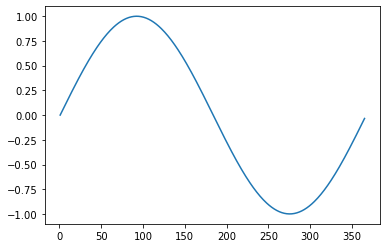

In [11]:
x = range(1,366)
vals = pd.date_range(start='1/1/2004', periods=365)
y = convert_epoch_dt_to_dec(vals)[1]
plt.plot(x,y)

array([ 0.     ,  0.10455,  0.2079 ,  0.309  ,  0.4067 ,  0.5    ,
        0.588  ,  0.669  ,  0.743  ,  0.809  ,  0.866  ,  0.9136 ,
        0.951  ,  0.978  ,  0.9946 ,  1.     ,  0.9946 ,  0.978  ,
        0.951  ,  0.9136 ,  0.866  ,  0.809  ,  0.743  ,  0.669  ,
        0.588  ,  0.5    ,  0.4067 ,  0.309  ,  0.2079 ,  0.10455,
        0.     , -0.10455, -0.2079 , -0.309  , -0.4067 , -0.5    ,
       -0.588  , -0.669  , -0.743  , -0.809  , -0.866  , -0.9136 ,
       -0.951  , -0.978  , -0.9946 , -1.     , -0.9946 , -0.978  ,
       -0.951  , -0.9136 , -0.866  , -0.809  , -0.743  , -0.669  ,
       -0.588  , -0.5    , -0.4067 , -0.309  , -0.2079 , -0.10455],
      dtype=float16)

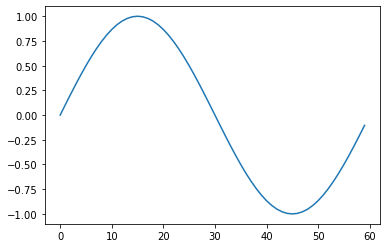

In [12]:
# Need to check if we reduce mem size, we can still realize the correct value

mn = range(0,60)
y = []
for m in mn:
    v = np.sin(6*m*np.pi/180.0).astype('float16')
    y.append(v)
plt.plot(mn,y)
np.array(y)

## Data Setup
This next part is where we decide on what our inputs and outputs will be and thus how our model is expected to operate.  This very important step drives all further decisions so it might be a good idea to explore a few different ideas here.  But this is one idea.

Input
 - Reference TLE Data ( incl. EPOCH)
 - Target EPOCH (the main driver of target)
 
Output
 - Target TLE Data

In [13]:
def create_xy(dfs, norad):
    df = dfs[dfs['NORAD_CAT_ID'] == norad][tle_columns].copy()
    
    # ML Structure
    # Input:
    #  - Reference TLE Data (+ EPOCH)
    #  - Target EPOCH
    # Output:
    #  - Target TLE Data

    df['EPOCH_UNIX_SEC'] = df.index.astype(int)/ 10**9

    X_all = None
    Y_all = None

    # Build the X_full and y_full datasets
    for x_epoch, y_epoch in tqdm(itertools.combinations(df.index, 2)):
        x_row = df.loc[[x_epoch]]
        x_row['TARGET_EPOCH_UNIX_SEC'] = df.loc[y_epoch]['EPOCH_UNIX_SEC']
        y_row = df.loc[[y_epoch]].iloc[:,:-1]
        y_row.index = x_row.index
        if X_all is None:
            X_all = x_row
            Y_all = y_row
        else:
            X_all = pd.concat([X_all,x_row])
            Y_all = pd.concat([Y_all,y_row])
            
    return X_all, Y_all

X,y = create_xy(dfs, 7078)

3321it [00:05, 574.31it/s]


In [14]:
X.head(1)

,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION,EPOCH_UNIX_SEC,TARGET_EPOCH_UNIX_SEC
EPOCH,,,,,,,,,,,
2004-04-27 11:23:32.964576,0.000869,0.0,0.084359,102.8764,73.1404,0.064993,168.8813,192.9096,13.111853,1.083065e+09,1.083190e+09


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=0),
    "GradientBoost": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10, random_state=0)),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "SVM": MultiOutputRegressor(SVR()),
}

# Let's see how it does on the same NORAD
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_test, y_test)
    print (f'{name} got score {score}')

Extra trees got score 0.9998125223100127
Random Forest got score 0.999848252445799
GradientBoost got score 0.88829400515219
K-nn got score 0.9942677192140086
Linear regression got score 0.9667007349692258
Ridge got score -113675.07852462778
SVM got score 0.19701884914045653


## Satellite Position Check (TLE)

In [17]:
import sgp4
from sgp4.api import Satrec, WGS72, SatrecArray
from sgp4.conveniences import jday_datetime
from datetime import datetime, timedelta, timezone

df_test = dfs[dfs['NORAD_CAT_ID'] == 7078].iloc[0]
tle1 = df_test['TLE_LINE1']
tle2 = df_test['TLE_LINE2']

s = Satrec.twoline2rv(tle1,tle2)

epoch_dt = df_test.name.replace(tzinfo=timezone.utc)
jd, fr = jday_datetime(epoch_dt)
print(jd,fr)

s.sgp4(jd,fr)

2453122.5 0.47468709


(0,
 (2348.349105157936, 7733.402276368272, 19.735607473862174),
 (1.4149561640117545, -0.550218237297203, 6.625596828336947))

In [18]:
jd, fr = jday_datetime(datetime.now())
print(jd,fr)

s.sgp4(jd,fr)

2459276.5 0.059849724421296296


(1, (nan, nan, nan), (nan, nan, nan))

In [19]:
from sgp4.api import SGP4_ERRORS
SGP4_ERRORS[6]

'mrt is less than 1.0 which indicates the satellite has decayed'

## Satellite Position Check (array)

In [20]:
df_test = dfs[dfs['NORAD_CAT_ID'] == 7078].iloc[0:2]
df_test.head()
#df_test.index.tz_localize('utc').to_pydatetime()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2,INCLINATION_r,RA_OF_ASC_NODE_r,ARG_OF_PERICENTER_r,MEAN_ANOMALY_r
EPOCH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-27 11:23:32.964576,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-05-19T21:06:51,18 SPCS,DELTA 1 DEB,1973-086BW,EARTH,TEME,UTC,SGP4,13.111853,0.064993,102.8764,73.1404,168.8813,192.9096,0,U,7078,999,33625,0.084359,0.000869,0.0,7596.718,109.824,1712.319,724.848,DEBRIS,MEDIUM,US,1973-11-06,AFWTR,NaN,63,865,0 DELTA 1 DEB,1 07078U 73086BW 04118.47468709 .00086944 0...,2 07078 102.8764 73.1404 0649933 168.8813 192...,-0.434489,0.957018,0.192842,-0.223413
2004-04-28 22:11:00.003839,2.0,GENERATED VIA SPACE-TRACK.ORG API,2004-05-19T21:09:01,18 SPCS,DELTA 1 DEB,1973-086BW,EARTH,TEME,UTC,SGP4,13.113151,0.064973,102.8703,74.9010,165.0278,196.7458,0,U,7078,999,33644,0.031135,0.000319,0.0,7596.217,109.813,1711.633,724.532,DEBRIS,MEDIUM,US,1973-11-06,AFWTR,NaN,428,6524,0 DELTA 1 DEB,1 07078U 73086BW 04119.92430560 .00031925 0...,2 07078 102.8703 74.9010 0649732 165.0278 196...,-0.434297,0.965477,0.258350,-0.288126


In [21]:
from sgp4.api import Satrec, WGS72

df_test = dfs[dfs['NORAD_CAT_ID'] == 7078].iloc[0]

r = datetime.strptime('12/31/1949 00:00:00', '%m/%d/%Y %H:%M:%S')
epoch_days = (df_test.name-r)/np.timedelta64(1, 'D')
print('Epoch Days:',epoch_days)

s2 = Satrec()
s2.sgp4init(
     WGS72,           # gravity model
     'i',             # 'a' = old AFSPC mode, 'i' = improved mode
     df_test['NORAD_CAT_ID'],               # satnum: Satellite number
     epoch_days,       # epoch: days since 1949 December 31 00:00 UT
     df_test['BSTAR'],      # bstar: drag coefficient (/earth radii)
     df_test['MEAN_MOTION_DOT'], # ndot (NOT USED): ballistic coefficient (revs/day)
     df_test['MEAN_MOTION_DDOT'],             # nddot (NOT USED): mean motion 2nd derivative (revs/day^3)
     df_test['ECCENTRICITY'],       # ecco: eccentricity
     df_test['ARG_OF_PERICENTER']*np.pi/180, # argpo: argument of perigee (radians)
     df_test['INCLINATION']*np.pi/180, # inclo: inclination (radians)
     df_test['MEAN_ANOMALY']*np.pi/180, # mo: mean anomaly (radians)
     df_test['MEAN_MOTION']*np.pi/(4*180), # no_kozai: mean motion (radians/minute)
     df_test['RA_OF_ASC_NODE']*np.pi/180, # nodeo: right ascension of ascending node (radians)
 )

epoch_dt = df_test.name.replace(tzinfo=timezone.utc)
jd, fr = jday_datetime(epoch_dt)

pos1 = s.sgp4(jd, fr)[1] 
pos2 = s2.sgp4(jd, fr)[1] 

print(pos1)
print(pos2)

Epoch Days: 19841.47468709
(2348.349105157936, 7733.402276368272, 19.735607473862174)
(2348.349104952569, 7733.402276448135, 19.735606512076824)


In [22]:
def mean_square_error(pos1, pos2):
    return ((np.array(pos1)- np.array(pos2))**2).mean(0)

print(mean_square_error(pos1,pos2))

3.245281895778233e-13


## Approximate the Error (in kilometers)

In [20]:
import sgp4

X.iloc[0]

MEAN_MOTION_DOT          8.694400e-04
MEAN_MOTION_DDOT         0.000000e+00
BSTAR                    8.435900e-02
INCLINATION              1.028764e+02
RA_OF_ASC_NODE           7.314040e+01
ECCENTRICITY             6.499330e-02
ARG_OF_PERICENTER        1.688813e+02
MEAN_ANOMALY             1.929096e+02
MEAN_MOTION              1.311185e+01
EPOCH_UNIX_SEC           1.083065e+09
TARGET_EPOCH_UNIX_SEC    1.083190e+09
Name: 2004-04-27 11:23:32.964576, dtype: float64

In [21]:
from datetime import datetime, timedelta, timezone

r = datetime.strptime('12/31/1949 00:00:00', '%m/%d/%Y %H:%M:%S') #.replace(tzinfo=timezone.utc)
ed = pd.to_datetime(X['EPOCH_UNIX_SEC'], unit='s') #.dt.tz_convert('UTC')# converts unix sec back to datetime
td = pd.to_datetime(X['TARGET_EPOCH_UNIX_SEC'], unit='s') #.dt.tz_localize('UTC') # converts unix sec back to datetime
epoch_days = (ed-r)/np.timedelta64(1, 'D')
target_days = (td-r)/np.timedelta64(1, 'D')
epoch_days

EPOCH
2004-04-27 11:23:32.964576    19841.474687
2004-04-27 11:23:32.964576    19841.474687
2004-04-27 11:23:32.964576    19841.474687
2004-04-27 11:23:32.964576    19841.474687
2004-04-27 11:23:32.964576    19841.474687
                                  ...     
2001-05-29 13:53:18.702816    18777.578689
2001-05-29 13:53:18.702816    18777.578689
2001-05-30 12:47:22.989408    18778.532905
2001-05-30 12:47:22.989408    18778.532905
2004-05-27 22:23:38.974272    19871.933090
Name: EPOCH_UNIX_SEC, Length: 3321, dtype: float64

In [33]:
X.iloc[0]

MEAN_MOTION_DOT          8.694400e-04
MEAN_MOTION_DDOT         0.000000e+00
BSTAR                    8.435900e-02
INCLINATION              1.028764e+02
RA_OF_ASC_NODE           7.314040e+01
ECCENTRICITY             6.499330e-02
ARG_OF_PERICENTER        1.688813e+02
MEAN_ANOMALY             1.929096e+02
MEAN_MOTION              1.311185e+01
EPOCH_UNIX_SEC           1.083065e+09
TARGET_EPOCH_UNIX_SEC    1.083190e+09
Name: 2004-04-27 11:23:32.964576, dtype: float64

- INCLINATION: 0-180 degree
- RA_OF_ASC_NODE: 0-360 degree
- ARG_OF_PERICENTER: 0-360 degree
- MEAN_ANOMALY: 0-360 degree

In [86]:
from sgp4.api import Satrec, WGS72

s = Satrec()
s.sgp4init(
     WGS72,           # gravity model
     'i',             # 'a' = old AFSPC mode, 'i' = improved mode
     0,               # satnum: Satellite number
     epoch_days.iloc[0],       # epoch: days since 1949 December 31 00:00 UT
     X.iloc[0]['BSTAR'],      # bstar: drag coefficient (/earth radii)
     X.iloc[0]['MEAN_MOTION_DOT'], # ndot (NOT USED): ballistic coefficient (revs/day)
     X.iloc[0]['MEAN_MOTION_DDOT'],             # nddot (NOT USED): mean motion 2nd derivative (revs/day^3)
     X.iloc[0]['ECCENTRICITY'],       # ecco: eccentricity
     X.iloc[0]['ARG_OF_PERICENTER']*np.pi/180, # argpo: argument of perigee (radians)
     X.iloc[0]['INCLINATION']*np.pi/180, # inclo: inclination (radians)
     X.iloc[0]['MEAN_ANOMALY']*np.pi/180, # mo: mean anomaly (radians)
     X.iloc[0]['MEAN_MOTION']*np.pi/180, # no_kozai: mean motion (radians/minute)
     X.iloc[0]['RA_OF_ASC_NODE']*np.pi/180, # nodeo: right ascension of ascending node (radians)
 )

s

In [89]:
from sgp4.conveniences import jday_datetime
# jd, fr = jday_datetime(ed.iloc[0].replace(tzinfo=timezone.utc))
jd, fr = jday_datetime(X.iloc[0].name.replace(tzinfo=timezone.utc))
display(jd,fr)
s.sgp4(jd, fr)

2453122.5

0.47468709

(6,
 (931.6877070829452, 3075.12551467468, -0.9964963961997108),
 (2.244222494933046, -0.8566715755171309, 10.521005498110991))

## Make another go of it

In [7]:
# Now let's see how a trained estimator does on a completely different NORAD
# Probably terrible!  But let's see...

X_unseen,y_unseen = create_xy(dfs, 10831)

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_unseen, y_unseen)
    print (f'{name} got score {score}')

3003it [00:11, 261.97it/s]


Extra trees got score -1.5058222643647578e+36
Random Forest got score -1.5477084834072437e+36
Multi Output got score -9.706070233006315e+35
K-nn got score -1.4810597580460391e+36
Linear regression got score -5.091533831438458e+37
Ridge got score -1.9707989073247515e+40


In [8]:
# Yup, that was bad...

# Let's try breaking up this unseen data into a train/test set and then train the estimators
# on the combination of the two norads and let's see how it does then...


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_unseen, y_unseen, test_size=0.33, random_state=42, shuffle=True)
X_train = pd.concat([X_train,X_train2])
X_test = pd.concat([X_test,X_test2])
y_train = pd.concat([y_train,y_train2])
y_test = pd.concat([y_test,y_test2])

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_test, y_test)
    print (f'{name} got score {score}')

Extra trees got score 0.9998566839646171
Random Forest got score 0.9998786292928337
Multi Output got score 0.853093750999509
K-nn got score 0.18356208281274988
Linear regression got score 0.6144203347823303
Ridge got score -533373911.27610946


In [12]:
# Let's try another unseen set... just because...

# Now let's see how a trained estimator does on a completely different NORAD
# Probably terrible!  But let's see...

X_unseen,y_unseen = create_xy(dfs, 19135)

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_unseen, y_unseen)
    print (f'{name} got score {score}')

2850it [00:12, 227.00it/s]


Extra trees got score -288220.69951874984
Random Forest got score -290006.0062828467
Multi Output got score -284527.4872249372
K-nn got score -288162.91723816615
Linear regression got score -803021.7898515747
Ridge got score -348390342486.1347


In [ ]:
# Better...kinda?  But still very bad
# Plan:
#  - Build a loader that loads all the data creates a giant X,y dataset
#     - Focus on non-Payload items
#     - Save off only the TLE parameters  (validate gp parameters match TLE)
#  - Train on subset

# Things to check / do
#  - Should we add values based on back/forward dating the TLE to match the target?
#  - Can we include things like solar minima/maxima
#  - Should we include other things like object size?
#  - Need to develop methods to test 
